## Import Libraries

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Set the path to the CSV file
csv_file_path = '../Dataset/TWOSIDES.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

/var/folders/pv/wpg0wtcs5kj1758khrqy155m0000gn/T/ipykernel_18682/1802199231.py:4: DtypeWarning: Columns (0,2,4,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [3]:
df.head()

,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
0,10355,Temazepam,136411,sildenafil,10003239,Arthralgia,7,149,24,1536,2.91667,0.421275,0.0448718
1,1808,Bumetanide,7824,Oxytocin,10003239,Arthralgia,1,13,2,138,5.0,1.19224,0.0714286
2,221147,POLYETHYLENE GLYCOL 3350,5521,Hydroxychloroquine,10003239,Arthralgia,6,103,20,1070,3.0,0.454505,0.0550459
3,10324,Tamoxifen,8640,Prednisone,10012735,Diarrhoea,18,123,35,1375,5.14286,0.276271,0.12766
4,10355,Temazepam,136411,sildenafil,10012735,Diarrhoea,2,154,37,1523,0.540541,0.721093,0.0128205


In [4]:
df.describe()

,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
count,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391.0,4.292039e+07,4.292039e+07
unique,1961,1716,2086,1842,17138,12726,1548,22813,5253,142302,91183.0,6.515420e+05,2.243100e+05
top,1191,Aspirin,10582,levothyroxine,10028813,Nausea,1,11,1,99,10.0,1.374770e+00,8.333330e-02
freq,859673,860674,597320,598041,163924,164167,21186431,202351,10026797,104115,9208100.0,8.305800e+04,2.117930e+05


In [5]:
# Basic Information
print("Dataset Info:\n")
print(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42920391 entries, 0 to 42920390
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   drug_1_rxnorn_id          object
 1   drug_1_concept_name       object
 2   drug_2_rxnorm_id          object
 3   drug_2_concept_name       object
 4   condition_meddra_id       object
 5   condition_concept_name    object
 6   A                         object
 7   B                         object
 8   C                         object
 9   D                         object
 10  PRR                       object
 11  PRR_error                 object
 12  mean_reporting_frequency  object
dtypes: object(13)
memory usage: 4.2+ GB
None


In [6]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

drug_1_rxnorn_id            0
drug_1_concept_name         0
drug_2_rxnorm_id            0
drug_2_concept_name         0
condition_meddra_id         0
condition_concept_name      0
A                           0
B                           0
C                           0
D                           0
PRR                         0
PRR_error                   0
mean_reporting_frequency    0
dtype: int64


In [7]:
print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Summary Statistics:

        drug_1_rxnorn_id drug_1_concept_name  drug_2_rxnorm_id  \
count           42920391            42920391          42920391   
unique              1961                1716              2086   
top                 1191             Aspirin             10582   
freq              859673              860674            597320   

       drug_2_concept_name  condition_meddra_id condition_concept_name  \
count             42920391             42920391               42920391   
unique                1842                17138                  12726   
top          levothyroxine             10028813                 Nausea   
freq                598041               163924                 164167   

               A         B         C         D         PRR     PRR_error  \
count   42920391  42920391  42920391  42920391  42920391.0  4.292039e+07   
unique      1548     22813      5253    142302     91183.0  6.515420e+05   
top            1        11         1        99  

In [8]:
# Check unique values per column
print("\nUnique Values per Column:\n")
print(df.nunique())


Unique Values per Column:

drug_1_rxnorn_id              1961
drug_1_concept_name           1716
drug_2_rxnorm_id              2086
drug_2_concept_name           1842
condition_meddra_id          17138
condition_concept_name       12726
A                             1548
B                            22813
C                             5253
D                           142302
PRR                          91183
PRR_error                   651542
mean_reporting_frequency    224310
dtype: int64



Top 10 Drug Interactions:
 Drug_Pair
Aspirin - Simvastatin        5700
Aspirin - Metoprolol         5625
Aspirin - Furosemide         5590
Aspirin - atorvastatin       5579
Aspirin - Omeprazole         5125
Folic Acid - Methotrexate    5120
Amlodipine - Aspirin         5117
Aspirin - Acetaminophen      5062
Aspirin - clopidogrel        5035
Aspirin - Lisinopril         5016
Name: count, dtype: int64


/var/folders/pv/wpg0wtcs5kj1758khrqy155m0000gn/T/ipykernel_18682/409848258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_interactions.index, x=top_interactions.values, palette='viridis')


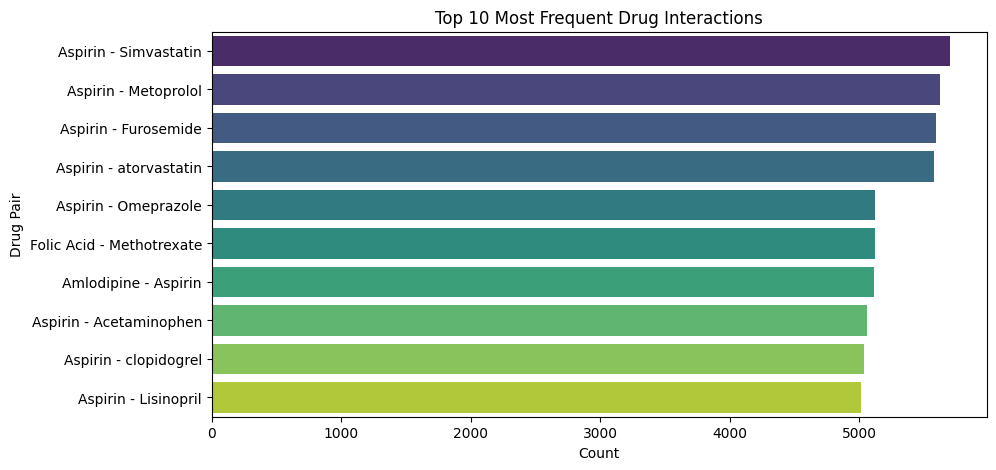


All cases where one drug is Aspirin and the other is Simvastatin:



In [9]:
if 'drug_1_concept_name' in df.columns and 'drug_2_concept_name' in df.columns:
    df['Drug_Pair'] = df['drug_1_concept_name'] + ' - ' + df['drug_2_concept_name']
    top_interactions = df['Drug_Pair'].value_counts().head(10)
    print("\nTop 10 Drug Interactions:\n", top_interactions)

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.barplot(y=top_interactions.index, x=top_interactions.values, palette='viridis')
    plt.xlabel("Count")
    plt.ylabel("Drug Pair")
    plt.title("Top 10 Most Frequent Drug Interactions")
    plt.show()

    # Filter cases where one drug is Aspirin and the other is Simvastatin
    aspirin_simvastatin_df = df[((df['drug_1_concept_name'] == 'Aspirin') & (df['drug_2_concept_name'] == 'Simvastatin')) |
                                ((df['drug_1_concept_name'] == 'Simvastatin') & (df['drug_2_concept_name'] == 'Aspirin'))]
    print("\nAll cases where one drug is Aspirin and the other is Simvastatin:\n")
    

In [10]:
aspirin_simvastatin_df.head(10)

,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency,Drug_Pair
8183983,1191,Aspirin,36567,Simvastatin,10002080,Anaemia vitamin B12 deficiency,3,37568,8,375702,3.75,0.676982,0.00008,Aspirin - Simvastatin
8183984,1191,Aspirin,36567,Simvastatin,10022972,Iron deficiency anaemia,81,37490,205,375505,3.95122,0.131128,0.002156,Aspirin - Simvastatin
8183985,1191,Aspirin,36567,Simvastatin,10034695,Pernicious anaemia,3,37568,16,375694,1.875,0.62913,0.00008,Aspirin - Simvastatin
8183986,1191,Aspirin,36567,Simvastatin,10002034,Anaemia,898,36673,4536,371174,1.97972,0.036122,0.023901,Aspirin - Simvastatin
8183987,1191,Aspirin,36567,Simvastatin,10002064,Anaemia macrocytic,14,37557,53,375657,2.64151,0.300445,0.000373,Aspirin - Simvastatin
8183988,1191,Aspirin,36567,Simvastatin,10002065,Anaemia megaloblastic,1,37570,13,375697,0.769231,1.03773,0.000027,Aspirin - Simvastatin
8183989,1191,Aspirin,36567,Simvastatin,10048861,Anaemia postoperative,11,37560,57,375653,1.92982,0.329278,0.000293,Aspirin - Simvastatin
8183990,1191,Aspirin,36567,Simvastatin,10052293,Haemorrhagic anaemia,92,37479,152,375558,6.05263,0.131982,0.002449,Aspirin - Simvastatin
8183991,1191,Aspirin,36567,Simvastatin,10020969,Hypochromic anaemia,4,37567,24,375686,1.66667,0.540035,0.000106,Aspirin - Simvastatin
8183992,1191,Aspirin,36567,Simvastatin,10025487,Malaria,1,37570,27,375683,0.37037,1.01834,0.000027,Aspirin - Simvastatin


In [11]:
# Co-occurrence analysis: Finding drugs that frequently appear together
if 'drug_1_concept_name' in df.columns and 'drug_2_concept_name' in df.columns:
    co_occurrence = df.groupby(['drug_1_concept_name', 'drug_2_concept_name']).size().reset_index(name='Count')
    co_occurrence = co_occurrence.sort_values(by='Count', ascending=False).head(10)
    print("\nTop 10 Co-Occurring Drug Pairs:\n", co_occurrence)


Top 10 Co-Occurring Drug Pairs:
       drug_1_concept_name drug_2_concept_name  Count
10499             Aspirin         Simvastatin   5700
10297             Aspirin          Metoprolol   5625
10133             Aspirin          Furosemide   5590
10667             Aspirin        atorvastatin   5579
10357             Aspirin          Omeprazole   5125
58772          Folic Acid        Methotrexate   5120
6949           Amlodipine             Aspirin   5117
9793              Aspirin       Acetaminophen   5062
10743             Aspirin         clopidogrel   5035
10244             Aspirin          Lisinopril   5016


In [12]:
df

,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency,Drug_Pair
0,10355,Temazepam,136411,sildenafil,10003239,Arthralgia,7,149,24,1536,2.91667,0.421275,0.0448718,Temazepam - sildenafil
1,1808,Bumetanide,7824,Oxytocin,10003239,Arthralgia,1,13,2,138,5.0,1.19224,0.0714286,Bumetanide - Oxytocin
2,221147,POLYETHYLENE GLYCOL 3350,5521,Hydroxychloroquine,10003239,Arthralgia,6,103,20,1070,3.0,0.454505,0.0550459,POLYETHYLENE GLYCOL 3350 - Hydroxychloroquine
3,10324,Tamoxifen,8640,Prednisone,10012735,Diarrhoea,18,123,35,1375,5.14286,0.276271,0.12766,Tamoxifen - Prednisone
4,10355,Temazepam,136411,sildenafil,10012735,Diarrhoea,2,154,37,1523,0.540541,0.721093,0.0128205,Temazepam - sildenafil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42920386,6142,Ketoprofen,88249,montelukast,10050954,Activities of daily living impaired,1,51,1,519,10.0,1.40671,0.019231,Ketoprofen - montelukast
42920387,6142,Ketoprofen,88249,montelukast,10052302,Impaired work ability,1,51,1,519,10.0,1.40671,0.019231,Ketoprofen - montelukast
42920388,6142,Ketoprofen,88249,montelukast,10053762,Off label use,3,49,13,507,2.30769,0.623781,0.057692,Ketoprofen - montelukast
42920389,6142,Ketoprofen,88249,montelukast,10020772,Hypertension,1,51,4,516,2.5,1.10853,0.019231,Ketoprofen - montelukast


In [ ]:
def deduplicate_drug_pairs_with_effects_simplified(df):
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Group by Drug_Pair and aggregate conditions into lists
    grouped = df_copy.groupby('Drug_Pair').agg({
        'drug_1_rxnorn_id': 'first',
        'drug_1_concept_name': 'first', 
        'drug_2_rxnorm_id': 'first',
        'drug_2_concept_name': 'first',
        'condition_meddra_id': lambda x: list(x),
        'condition_concept_name': lambda x: list(x)
    }).reset_index()
    
    
    # Create a new column with the count of effects for each drug pair
    grouped['effects_count'] = grouped['condition_concept_name'].apply(len)
    
    return grouped

In [14]:
result = deduplicate_drug_pairs_with_effects_simplified(df)

In [20]:
result

,Drug_Pair,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,effects_count
0,6-Aminocaproic Acid - ANTI-INHIBITOR COAGULANT...,99,6-Aminocaproic Acid,314504,ANTI-INHIBITOR COAGULANT COMPLEX,"[10002034, 10017955, 10013709, 10038695, 10051...","[Anaemia, Gastrointestinal haemorrhage, Drug i...",5
1,6-Aminocaproic Acid - Acetaminophen,99,6-Aminocaproic Acid,161,Acetaminophen,"[10002034, 10052293, 10033661, 10023126, 10021...","[Anaemia, Haemorrhagic anaemia, Pancytopenia, ...",127
2,6-Aminocaproic Acid - Acyclovir,99,6-Aminocaproic Acid,281,Acyclovir,"[10062489, 10059034, 10043554, 10024384, 10029...","[Leukaemia recurrent, Acute myeloid leukaemia ...",74
3,"6-Aminocaproic Acid - Albumin Human, USP",99,6-Aminocaproic Acid,828529,"Albumin Human, USP","[10002034, 10023126, 10006093, 10003658, 10061...","[Anaemia, Jaundice, Bradycardia, Atrial fibril...",39
4,6-Aminocaproic Acid - Albuterol,99,6-Aminocaproic Acid,435,Albuterol,"[10002034, 10052293, 10000880, 10006093, 10003...","[Anaemia, Haemorrhagic anaemia, Acute myeloid ...",41
...,...,...,...,...,...,...,...,...
211985,zotepine - Estazolam,40003,zotepine,4077,Estazolam,"[10028596, 10003549, 10017577, 10013710, 10013...","[Myocardial infarction, Asthenia, Gait disturb...",20
211986,zotepine - Flunitrazepam,40003,zotepine,4460,Flunitrazepam,"[10002034, 10043071, 10040752, 10007515, 10007...","[Anaemia, Tachycardia, Sinus tachycardia, Card...",138
211987,zotepine - Magnesium Oxide,40003,zotepine,6582,Magnesium Oxide,"[10002034, 10013442, 10043071, 10007515, 10007...","[Anaemia, Disseminated intravascular coagulati...",72
211988,zotepine - Methotrimeprazine,40003,zotepine,6852,Methotrimeprazine,"[10002034, 10003673, 10007617, 10028596, 10007...","[Anaemia, Atrioventricular block complete, Car...",55


In [22]:
## save the result to a CSV file
output_file_path = '../Dataset/TwoSidesSmall.csv'
result.to_csv(output_file_path, index=False)
print(f"\nDeduplicated drug interactions with effects saved to {output_file_path}")


Deduplicated drug interactions with effects saved to ../Dataset/TwoSidesSmall.csv


In [21]:
import pandas as pd
import numpy as np
import random

def generate_negative_samples(df):
    """
    Generate negative samples by randomly replacing one drug in each positive sample
    """
    # Create a copy of the original dataframe for positive samples
    positive_df = df.copy()
    
    # Create empty lists to store negative samples
    negative_samples = []
    
    # Get unique drug IDs and names for sampling
    unique_drug1_ids = df['drug_1_rxnorn_id'].unique()
    unique_drug1_names = df['drug_1_concept_name'].unique()
    unique_drug2_ids = df['drug_2_rxnorm_id'].unique()
    unique_drug2_names = df['drug_2_concept_name'].unique()
    
    # Create sets of existing drug pairs for quick lookup
    existing_pairs = set(zip(df['drug_1_rxnorn_id'], df['drug_2_rxnorm_id'], df['condition_meddra_id']))
    
    # For each positive sample, generate a negative sample
    for _, row in df.iterrows():
        # Decide randomly whether to replace drug 1 or drug 2
        replace_first_drug = random.choice([True, False])
        
        # Keep trying until we find a valid negative sample
        found_valid_negative = False
        max_attempts = 100  # Prevent infinite loops
        attempts = 0
        
        while not found_valid_negative and attempts < max_attempts:
            new_row = row.copy()
            
            if replace_first_drug:
                # Replace first drug
                new_drug1_id = random.choice(unique_drug1_ids)
                new_drug1_name = random.choice(unique_drug1_names)  # This is simplified; in practice, you'd want to match ID to name
                new_row['drug_1_rxnorn_id'] = new_drug1_id
                new_row['drug_1_concept_name'] = new_drug1_name
                
                # Check if this combination already exists as a positive sample
                if (new_drug1_id, row['drug_2_rxnorm_id'], row['condition_meddra_id']) not in existing_pairs:
                    found_valid_negative = True
            else:
                # Replace second drug
                new_drug2_id = random.choice(unique_drug2_ids)
                new_drug2_name = random.choice(unique_drug2_names)  # This is simplified; in practice, you'd want to match ID to name
                new_row['drug_2_rxnorm_id'] = new_drug2_id
                new_row['drug_2_concept_name'] = new_drug2_name
                
                # Check if this combination already exists as a positive sample
                if (row['drug_1_rxnorn_id'], new_drug2_id, row['condition_meddra_id']) not in existing_pairs:
                    found_valid_negative = True
                    
            attempts += 1
        
        if found_valid_negative:
            # Add a label column to distinguish negative samples
            new_row['label'] = 0  # 0 for negative samples
            negative_samples.append(new_row)
    
    # Convert list of negative samples to DataFrame
    negative_df = pd.DataFrame(negative_samples)
    
    # Add label column to positive samples
    positive_df['label'] = 1  
    
    # Combine positive and negative samples
    combined_df = pd.concat([positive_df, negative_df], ignore_index=True)
    
    return combined_df

# Generate the combined dataset with positive and negative samples
combined_dataset = generate_negative_samples(result)

# Display sample results
print(f"Total samples: {len(combined_dataset)}")
print(f"Positive samples: {len(combined_dataset[combined_dataset['label'] == 1])}")
print(f"Negative samples: {len(combined_dataset[combined_dataset['label'] == 0])}")

# Show a few examples
print("\nSample of positive and negative pairs:")
print(combined_dataset[['drug_1_concept_name', 'drug_2_concept_name', 'condition_concept_name', 'label']].head(10))

TypeError: unhashable type: 'list'